In [126]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import scikitplot as skplt

import seaborn as sns

# Loading text data

In [127]:
# Load train data
train_path = "C:/Users/Flo7u/python-tutorials/relataly-public-python-tutorials/data/sentiment-analysis/train.csv"
train_df = pd.read_csv(train_path) 
# Load data for the submission
sub_test_path = "C:/Users/Flo7u/python-tutorials/relataly-public-python-tutorials/data/sentiment-analysis/test.csv"
test_df = pd.read_csv(sub_test_path) 

print(train_df.shape, test_df.shape)
# the train data comprises 27481 text phrases that are labeled either "neutral", "negative" or "positive"

(27481, 4) (3534, 3)


In [192]:
train_df.head(5)

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [130]:
train_dfa = train_df.copy()
cleanup_nums = {"sentiment":     {"negative": 1, "neutral": 2, "positive": 3}}
train_dfa.replace(cleanup_nums, inplace=True)
train_dfa.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text  sentiment  
0  I`d have responded, if I were going          2  
1                             Sooo SAD          1  
2                          bullying me          1  
3                       leave me alone          1  
4                        Sons of ****,          1

# Exploring the data

Text(0, 0.5, 'Labels')

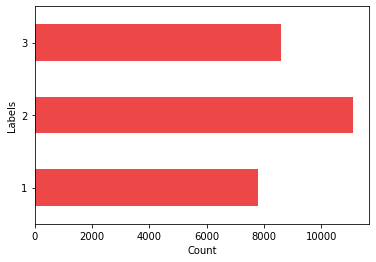

In [131]:
ax = train_dfa['sentiment'].value_counts(sort=False).plot(kind='barh', color='#EE4747')
ax.set_xlabel('Count')
ax.set_ylabel('Labels')

In [132]:
train_dfa['len'] = train_dfa['text'].str.len() # Store string length of each sample
train_dfa = train_dfa.sort_values(['len'], ascending=True)
train_dfa = train_dfa.dropna()
train_dfa.head(10) #We see that most of the short text phrases are rated positive

textID  text selected_text  sentiment  len
14339  5c6abc28a1    ow            ow          2  3.0
26005  0b3fe0ca78     ?             ?          2  3.0
11524  4105b6a05d    aw            aw          2  3.0
641    5210cc55ae    no            no          2  3.0
25699  ee8ee67cb3    ME            ME          2  3.0
19964  4f91f17179   boo           boo          2  4.0
735    a1bda541fd   yep           yep          2  4.0
11456  3c8698c64b   yup           yup          2  4.0
13983  a16a8f3fd4   gut           gut          2  4.0
1668   a2f9a26b7d   aww           aww          2  4.0

In [133]:
test_dfa = test_df.copy()
test_dfa.replace(cleanup_nums, inplace=True)
test_dfa.head(5)

textID                                               text  sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh          2
1  96d74cb729   Shanghai is also really exciting (precisely -...          3
2  eee518ae67  Recession hit Veronique Branquinho, she has to...          1
3  01082688c6                                        happy bday!          3
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!          3

# Training a Logistic Regression Classifier

              precision    recall  f1-score      support
negative       0.736479  0.639361  0.684492  1001.000000
neutral        0.643282  0.756643  0.695373  1430.000000
positive       0.796541  0.709882  0.750719  1103.000000
accuracy       0.708829  0.708829  0.708829     0.708829
macro avg      0.725434  0.701962  0.710195  3534.000000
weighted avg   0.717514  0.708829  0.709565  3534.000000


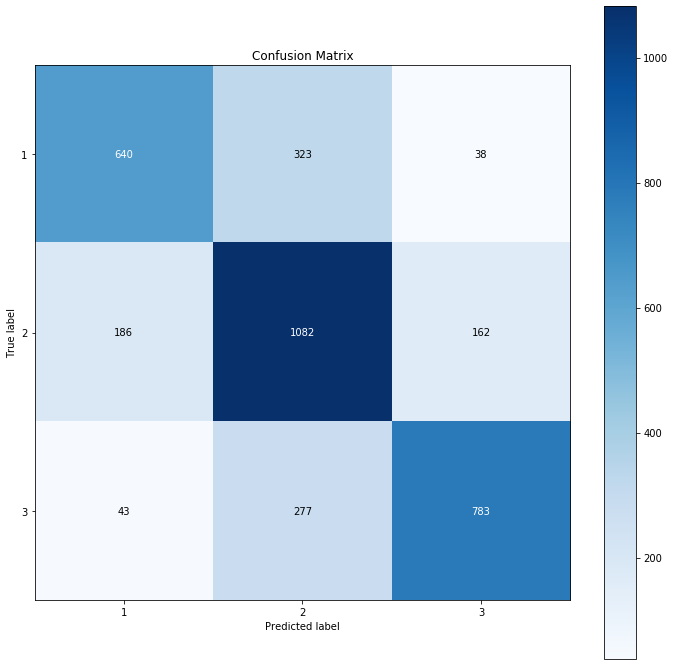

In [144]:
# Create a transformation pipeline
# The pipeline sequentially applies a list of transforms and as a final estimator logistic regression 
pipeline_log = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear', multi_class='auto')),
        ])

# Train model using the created sklearn pipeline
learner_log = pipeline_log.fit(train_dfa['text'], train_dfa['sentiment'])

# Predict class labels using the learner function
test_dfa['pred'] = learner_log.predict(test_dfa['text'])
y_true = test_dfa['sentiment']
y_pred = test_dfa['pred']
target_names = ['negative', 'neutral', 'positive']

# Confusion Matrix
results_log = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)
skplt.metrics.plot_confusion_matrix(y_true,  y_pred, figsize=(12,12))

# Training a Bayes Classifier

              precision    recall  f1-score      support
negative       0.782700  0.370629  0.503051  1001.000000
neutral        0.531678  0.868531  0.659586  1430.000000
positive       0.821823  0.539438  0.651341  1103.000000
accuracy       0.624788  0.624788  0.624788     0.624788
macro avg      0.712067  0.592866  0.604659  3534.000000
weighted avg   0.693337  0.624788  0.612674  3534.000000


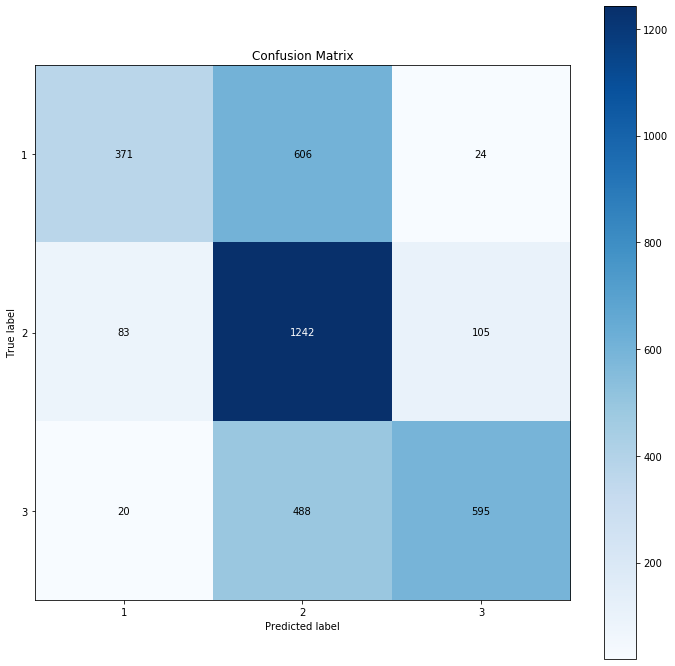

In [174]:
# Create a pipeline which transforms phrases into normalized feature vectors and uses a bayes estimator
pipeline_bayes = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('gnb', MultinomialNB()),
                ])

# Train model using the created sklearn pipeline
learner_bayes = pipeline_bayes.fit(train_dfa['text'], train_dfa['sentiment'])

# Predict class labels using the learner function
test_dfa['pred'] = learner_bayes.predict(test_dfa['text'])
y_true = test_dfa['sentiment']
y_pred_bayes = test_dfa['pred']
target_names = ['negative', 'neutral', 'positive']

# Confusion Matrix
results_bayes = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
results_df_bayes = pd.DataFrame(results_bayes).transpose()
print(results_df_bayes)
skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(12,12))

# Comparing classifier performance

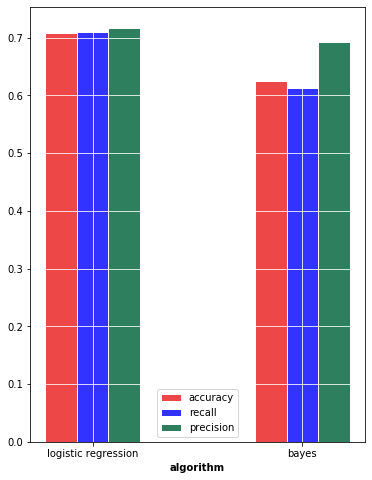

In [146]:
# Plotting the data

# Preparing bayes classifier metrics
bayes_precision = results_df_bayes['precision'].at['weighted avg']
bayes_f1_score = results_df_bayes['f1-score'].at['weighted avg']
bayes_accuracy = results_df_bayes['recall'].at['weighted avg']

# Preparing logistic regression classifier metrics
log_precision = results_df_log['precision'].at['weighted avg']
log_f1_score = results_df_log['f1-score'].at['weighted avg']
log_accuracy = results_df_log['recall'].at['weighted avg']

# Preparing the plot
fig, ax1 = plt.subplots(figsize=(6, 8))

# set width of bar
barWidth = 0.15
 
# set height of bar
accuracy = [log_accuracy, bayes_accuracy]
f1_score = [log_f1_score, bayes_f1_score]
precision = [log_precision, bayes_precision]

# Set position of bar on X axis
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, accuracy, color='#EE4747', width=barWidth, edgecolor='white', label='accuracy')
plt.bar(r2, f1_score, color='#3333ff', width=barWidth, edgecolor='white', label='recall')
plt.bar(r3, precision, color='#2d7f5e', width=barWidth, edgecolor='white', label='precision')
 
# Add xticks on the middle of the group bars
plt.xlabel('algorithm', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(accuracy))], ['logistic regression', 'bayes'])
 
# Create legend & Show graphic
plt.legend()
plt.grid(color='white')
plt.show()

# Making some test predictions

In [153]:
testphrases = ['Mondays just suck!', 'I love this product', 'That is a tree', 'Terrible service']
for testphrase in testphrases:
    resultx = learner_log.predict([testphrase])
    dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
    print(testphrase + '-> ' + dict[resultx[0]])

Mondays just suck!-> Negative
I love this product-> Positive
That is a tree-> Neutral
Terrible service-> Negative
